<img src="C:/Users/aalju/Downloads/online-sales-and-marketing-analysis-2706594-2270572.png" align="right"/>

<h1 align="center"> SALES ANALYSIS | تحليل المبيعات </h1> 


### Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import os

In [2]:
# All the Data in Different files it needs to be in one file 
files = [file for file in os.listdir('C:/Users/aalju/OneDrive/سطح المكتب/Sales_Data')]

all_months_data = pd.DataFrame()

for file in files:
    df = pd.read_csv("C:/Users/aalju/OneDrive/سطح المكتب/Sales_Data/"+file)
    all_months_data = pd.concat([all_months_data,df])
    
all_months_data.to_csv("all_sales_data.csv",index=False)

In [3]:
all_sales_data = pd.read_csv("C:/Users/aalju/all_sales_data.csv")
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [4]:
all_sales_data.shape

(186850, 6)

### Data Preprocessing

In [5]:
# Drop null values 
nan_df = all_sales_data[all_sales_data.isna().any(axis=1)]

all_sales_data = all_sales_data.dropna(how='all')

all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [6]:
# Find Or or Delete the string
all_sales_data = all_sales_data[all_sales_data['Order Date'].str[0:2] != 'Or']
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"


In [7]:
# Augment data with additional columns 
# Add Month Column
all_sales_data['Month'] = all_sales_data['Order Date'].str[0:2]
all_sales_data['Month'] = all_sales_data['Month'].astype('int32')
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4


In [8]:
# Convert Columns to the correct types
all_sales_data['Quantity Ordered'] = pd.to_numeric(all_sales_data['Quantity Ordered'])
all_sales_data['Price Each'] = pd.to_numeric(all_sales_data['Price Each'])

In [9]:
# add sales column
all_sales_data['Sales'] = all_sales_data['Quantity Ordered'] * all_sales_data['Price Each']
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9


In [10]:
# add city column 
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_sales_data['city'] = all_sales_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)


### EDA | Exploratory Data Analysis

Q1 : What was the best month for sales ? How much was earned that month?

In [11]:
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)


In [12]:
plt.rcParams["figure.figsize"] = (20,10)

In [13]:
results = all_sales_data.groupby('Month').sum()

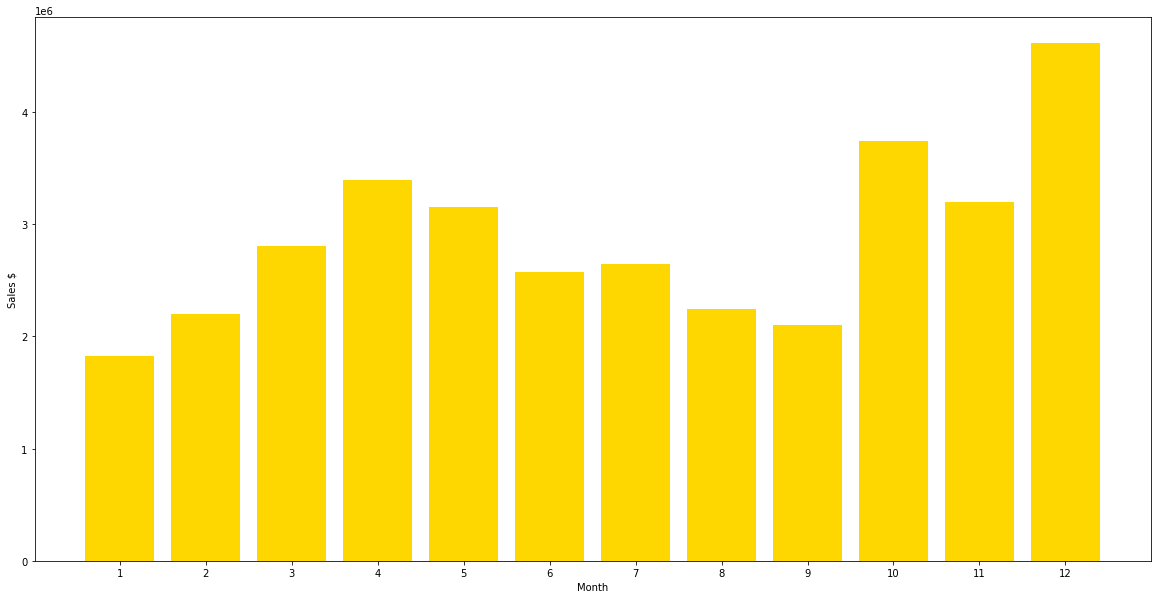

In [14]:

months = range(1,13)
plt.bar(months, results['Sales'],color='Gold')
plt.xticks(months)
plt.ylabel('Sales $')
plt.xlabel('Month')
plt.show()


Q2 : What city had the highest number of sales ?

In [15]:
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)


In [16]:
results = all_sales_data.groupby('city').sum()
results

,Quantity Ordered,Price Each,Month,Sales
city,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471893e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


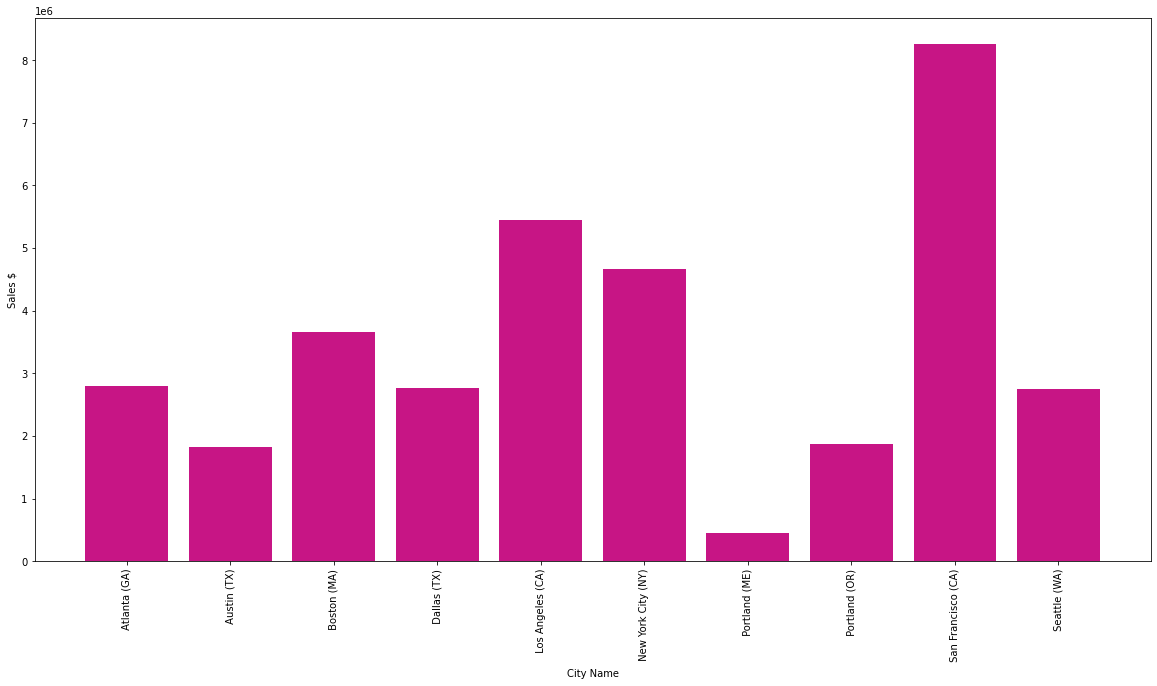

In [17]:
#cities = all_sales_data['city'].unique() # Using this Method will result wrong Visualization

cities = [city for city, df in all_sales_data.groupby('city')]

plt.bar(cities, results['Sales'],color='MediumVioletRed')
plt.xticks(cities, rotation='vertical',size=10)
plt.ylabel('Sales $')
plt.xlabel('City Name')
plt.show()

Q3 : What time should we display advertisements to maximize likelihood of Customers buying products ? 

In [18]:
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX)


In [19]:
all_sales_data['Order Date'] = pd.to_datetime(all_sales_data['Order Date'])

In [20]:
all_sales_data['Hour'] = all_sales_data['Order Date'].dt.hour

In [21]:
all_sales_data['Minute'] = all_sales_data['Order Date'].dt.minute

In [22]:
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8,46


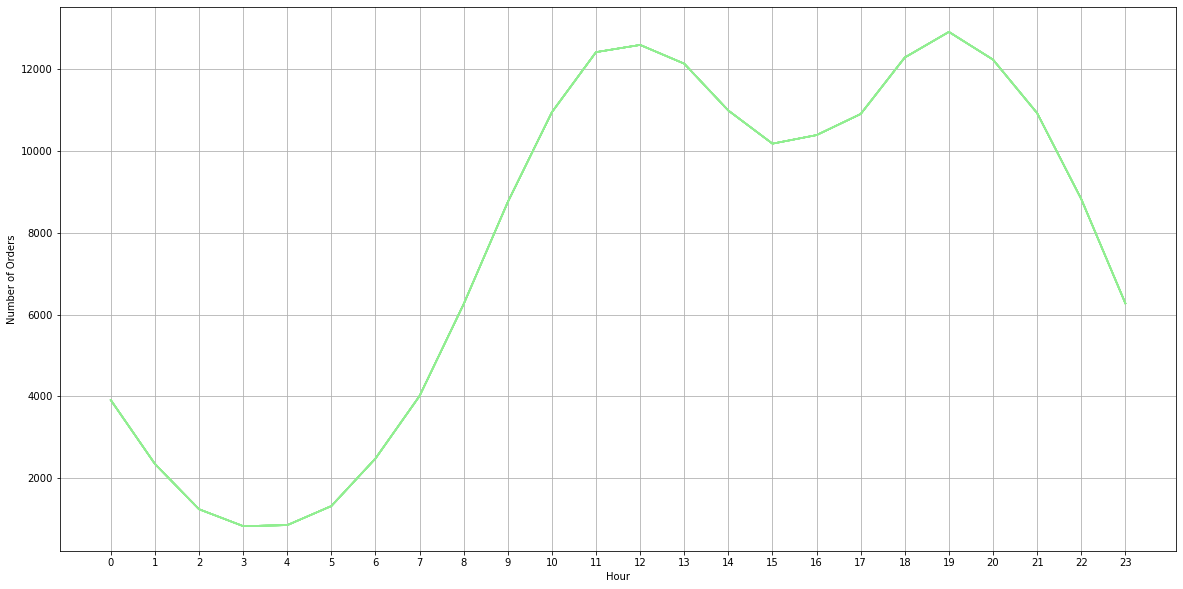

In [23]:
hours = [hour for hour, df in all_sales_data.groupby('Hour')]

plt.plot(hours,all_sales_data.groupby(['Hour']).count(),color='lightgreen')
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

Q4 : What products are the most often sold together?

In [24]:
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8,46


In [25]:
df = all_sales_data[all_sales_data['Order Date'].duplicated(keep=False)]

In [26]:
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

<ipython-input-26-9d66bca9fec4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


In [27]:
df = df[['Order ID','Grouped']].drop_duplicates()

In [28]:
df.head()

,Order ID,Grouped
0,176558,USB-C Charging Cable
2,176559,Bose SoundSport Headphones
3,176560,"Google Phone,Wired Headphones"
5,176561,Wired Headphones
6,176562,USB-C Charging Cable


In [29]:
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,1)))
    
for key, value in count.most_common(10):
    print(key,value)

('USB-C Charging Cable',) 9425
('Lightning Charging Cable',) 9074
('AAA Batteries (4-pack)',) 8266
('AA Batteries (4-pack)',) 8167
('Wired Headphones',) 8090
('Apple Airpods Headphones',) 6374
('Bose SoundSport Headphones',) 5459
('iPhone',) 3663
('Google Phone',) 3091
('27in FHD Monitor',) 3010


Q5 : What product sold the most ? why do you think it sold the most ?

In [30]:
all_sales_data.head(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.9,Dallas (TX),8,46


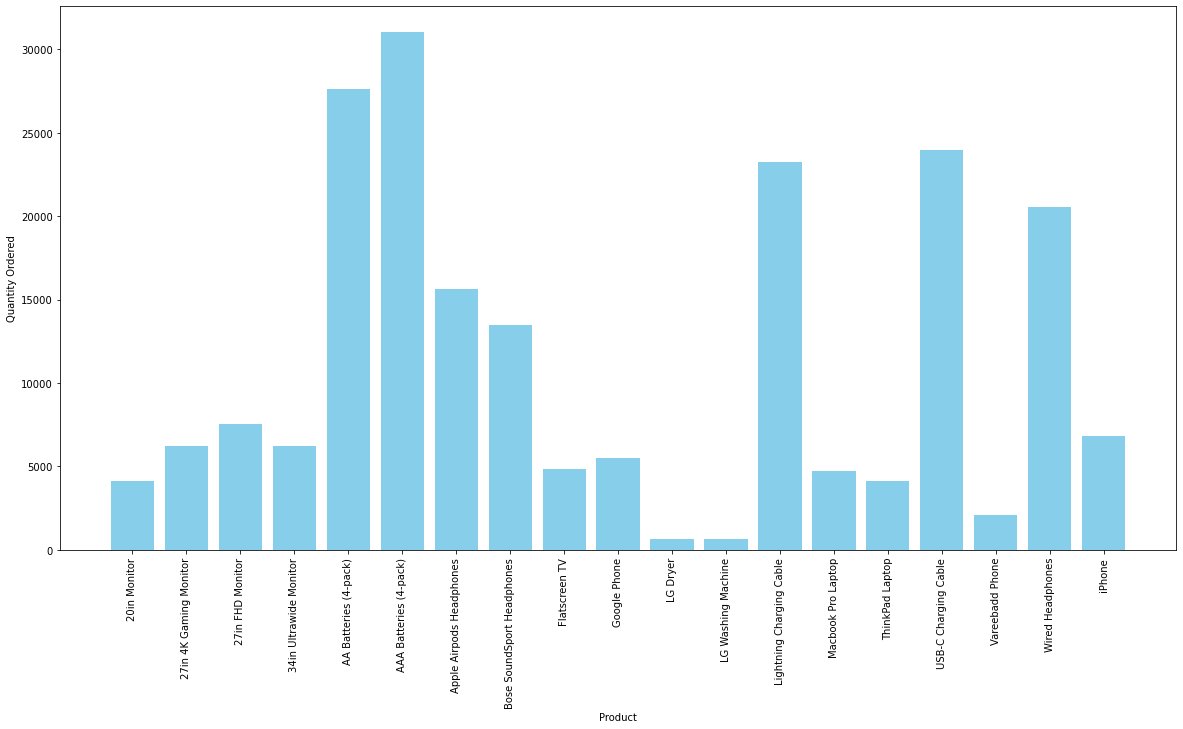

In [31]:
product_group = all_sales_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

products = [product for product, df in product_group]

plt.bar(products, quantity_ordered,color='skyblue')
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation='vertical',size=10)
plt.show()

In [32]:
prices = all_sales_data.groupby('Product').mean()['Price Each']
print(prices)

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64


In [33]:
all_sales_data['Quantity Ordered'].value_counts()

1    168552
2     13324
3      2920
4       806
5       236
6        80
7        24
8         5
9         3
Name: Quantity Ordered, dtype: int64

<ipython-input-34-d20a8cbbed90>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=10)


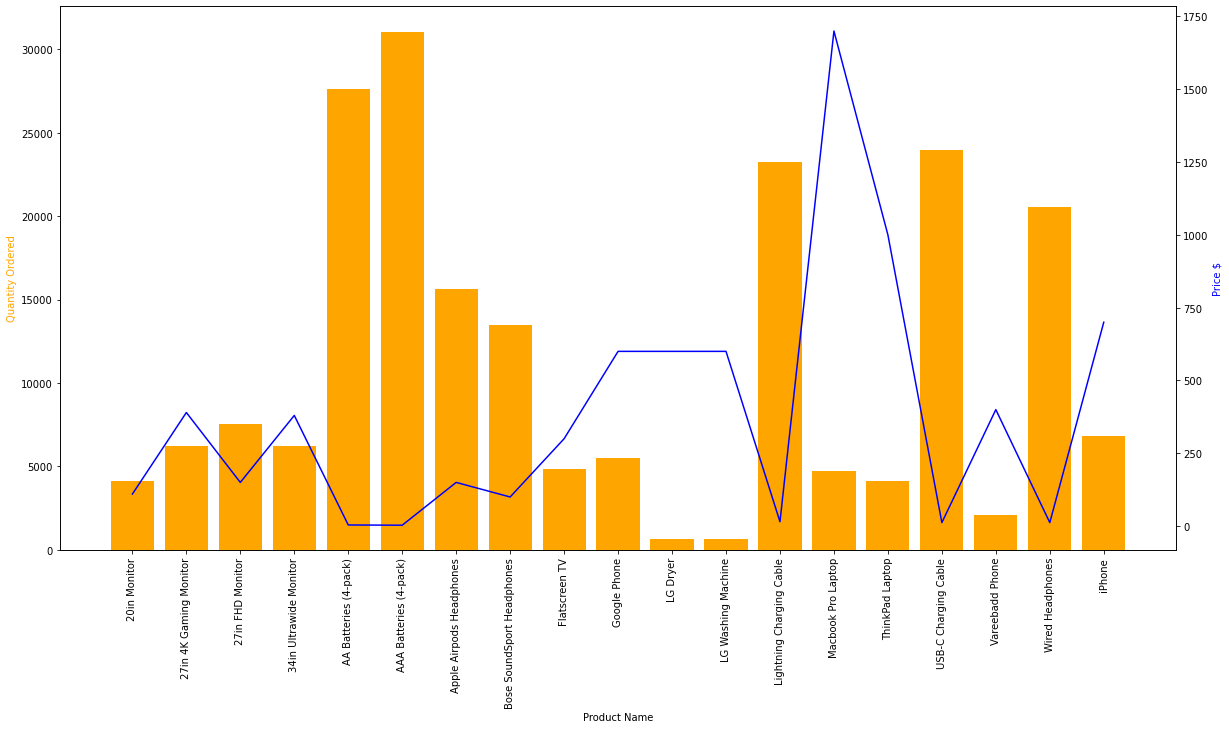

In [34]:
prices = all_sales_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered,color='orange')
ax2.plot(products,prices,'b-')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='orange')
ax2.set_ylabel('Price $', color='b')
ax1.set_xticklabels(products, rotation='vertical', size=10)

plt.show()


## Advanced Analytics 

In [35]:
all_sales_data.sample(1)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,city,Hour,Minute
61802,156496,Wired Headphones,2,11.99,2019-02-02 17:28:00,"523 Jackson St, San Francisco, CA 94016",2,23.98,San Francisco (CA),17,28
